<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Feature_Engineering_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Should we Use Feature Scaling?

    Gradient Descent Based Algorithms
                   

>  Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an
optimization technique require data to be scaled. 

>**Having features on a similar scale can help the gradient descent converge more quickly towards the minima.**


    Distance-Based Algorithms
>Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.


>  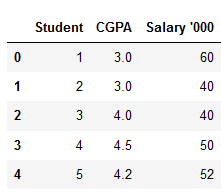




Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.


>**Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.**

# Feature Scaling Techniques


1.   Normalization
2.   Standardization
3.   Scaling to median and Quantiles
4.   Gaussian Transformation
        
        *   Log Transformation
        *   Reciprocal Transformation
        *   Exponential Transformation
        *   Square Root Transformation
        *   Box-Cox Transformation   





In [ ]:
from seaborn import load_dataset

import seaborn

In [ ]:
seaborn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
df = load_dataset('tips')

df[:4]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [ ]:
df['total_bill'].max()

50.81

# Normalization

**Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.**

        Min-Max scaler ----------> x_new = (x_old - x_min)/(x_max - x_min)

      

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import scipy.stats as stat
import pylab   # Q-Q PLOT
import matplotlib.pyplot as plt

In [ ]:
min_max = MinMaxScaler()

df['min_max'] = min_max.fit_transform(df[['tip']])

In [ ]:
def plot_data(data,feature):
  plt.figure(figsize=(15,6))
  plt.subplot(131)
  plt.hist(data['tip'])
  plt.subplot(132)
  stat.probplot(data['tip'],dist='norm',plot=pylab)
  plt.title('Tip')
  plt.subplot(133)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.title('AFTER '+feature)
  plt.show()

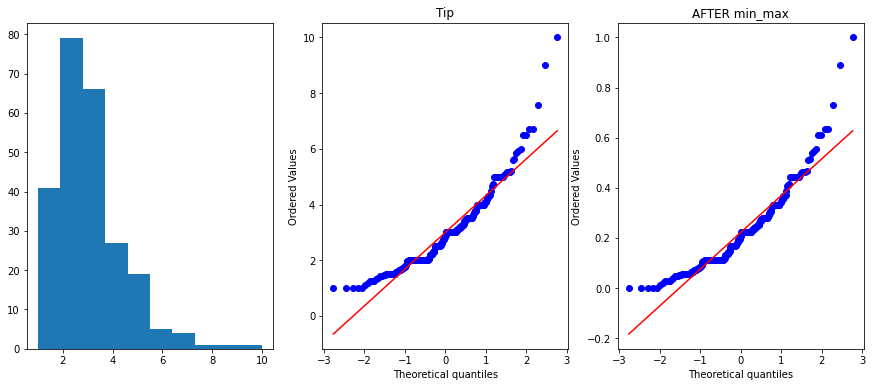

In [ ]:
plot_data(df,'min_max')

# Standardization

**Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.It is transformed to the distribution where mean is 0 and standard deviation is 1.It is used when there is normal distribution of data.**  


> x_new = (x_old-x_mean)/x_std



In [ ]:
Std_scaler = StandardScaler()

df['Standard_Scaler'] = Std_scaler.fit_transform(df[['tip']])

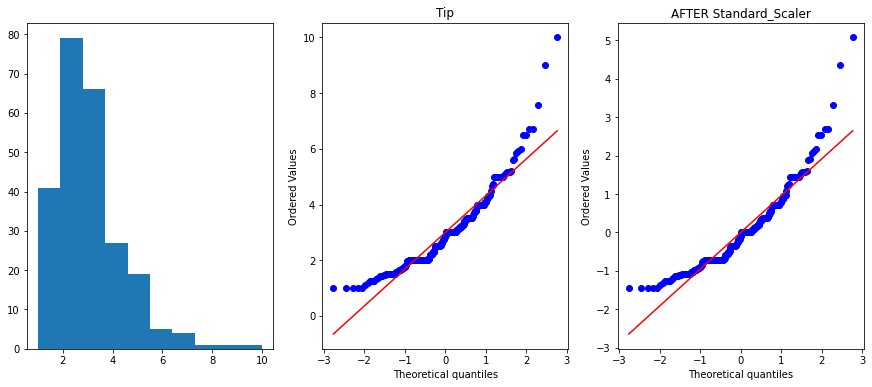

In [ ]:
plot_data(df,'Standard_Scaler')

# Robust Scaler   (Scaling to median and Quantiles)

        x_new = (x_old - x_median) / IQR

        IQR = Inter Quantile Range i.e Q3 - Q1

        where Q3 = 75 Percintile and
              Q1 = 25 Percintile

In [ ]:
RS = RobustScaler()

df['Robust_Scaler'] = RS.fit_transform(df[['tip']])

df['Robust_Scaler'].min(),df['Robust_Scaler'].max()

(-1.2160000000000002, 4.544000000000001)

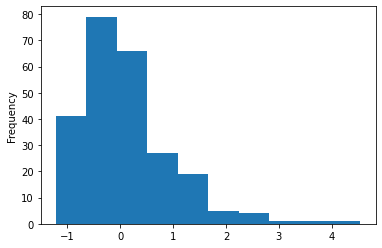

In [ ]:
df['Robust_Scaler'].plot.hist()

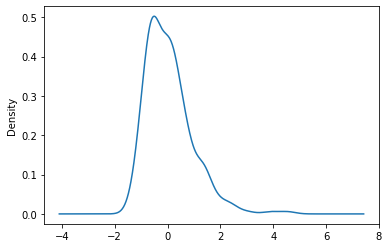

In [ ]:
df['Robust_Scaler'].plot.kde()

# Gaussian Transformation

  

1.  Log Transformation 



 
  
  
 







In [ ]:
import numpy as np

df['log_tip'] = np.log(df['tip'])

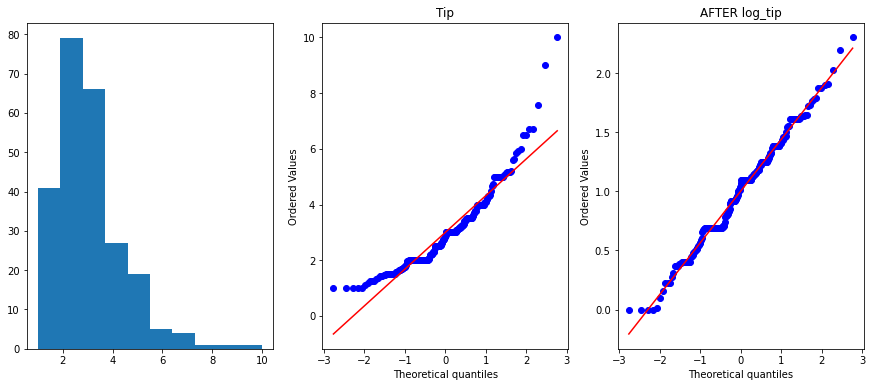

In [ ]:
plot_data(df,'log_tip')

**2)Reciprocal Transformation**

In [ ]:
df['rec_tip'] = 1/df['tip']

In [ ]:
df['rec_tip'][:4]

0    0.990099
1    0.602410
2    0.285714
3    0.302115
Name: rec_tip, dtype: float64

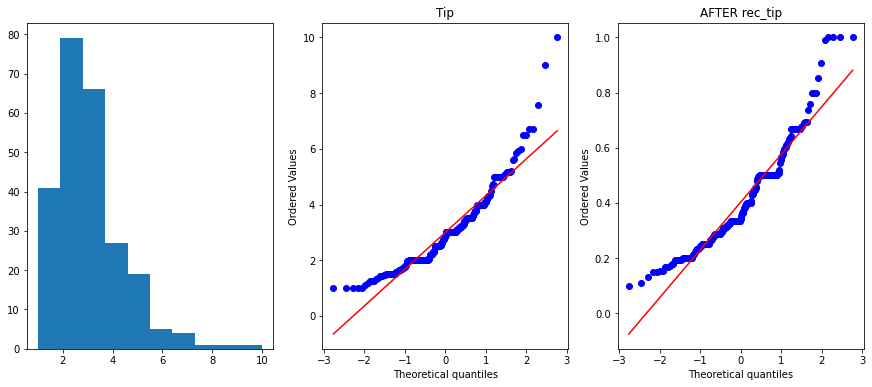

In [ ]:
plot_data(df,'rec_tip')

**3)Exponential Transformation**

In [ ]:
df['exponential_tip'] = df.tip**(1/1.2)

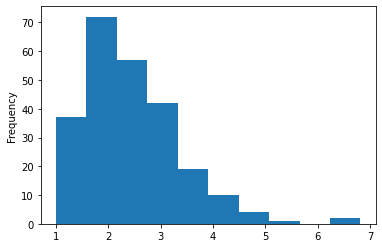

In [ ]:
df['exponential_tip'].plot.hist()

**4)Square Root Transformation**

In [ ]:
df["SqrT_tip"] = df['tip']**(1/2)

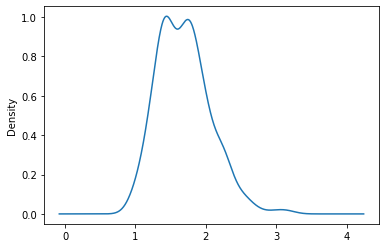

In [ ]:
df["SqrT_tip"].plot.kde()

**Box-Cox Transformation**

              Boxcox(Val) = (Val - exp(λ)-1)/λ 

              λ is an optimal value ranges from -5 to 5

In [ ]:
df['boxcox_tip'],Parameters = stat.boxcox(df['tip'])

In [ ]:
Parameters      # λ value internally taken as -0.06325976920300551

-0.06325976920300551

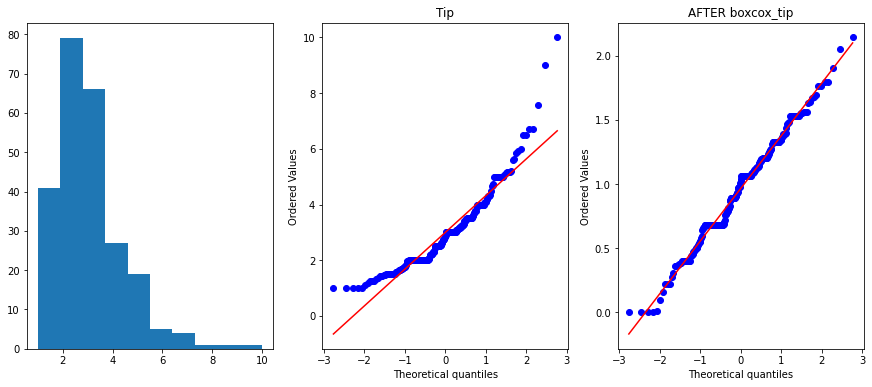

In [ ]:
plot_data(df,'boxcox_tip')

In [2]:
import sklearn

In [4]:
sklearn.show_versions()


System:
    python: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 50.3.0
   sklearn: 0.22.2.post1
     numpy: 1.18.5
     scipy: 1.4.1
    Cython: 0.29.21
    pandas: 1.1.2
matplotlib: 3.2.2
    joblib: 0.16.0

Built with OpenMP: True
